In [6]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = make_classification(n_samples=15000, n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=4,
                           n_clusters_per_class=1,
                           class_sep=3.0,
                           random_state=2)
data, labels  = data

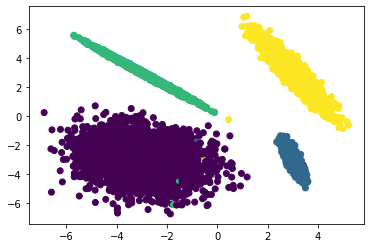

In [12]:
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()

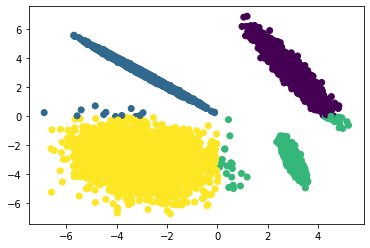

In [19]:
def kmeans(data, k=4, dist=np.linalg.norm):
    clusters = np.zeros((len(data),))
    distances = np.zeros((len(data), k))
    init_idx = np.random.choice(range(len(data)), k, replace=False)
    k_centers = data[init_idx]

    while True:
        for i in range(len(data)):
            for icluster in range(k):
                distances[i, icluster] = dist(k_centers[icluster] - data[i])

        nearest_clusters = np.argmin(distances, axis=1)
        if (nearest_clusters == clusters).all():
            break
        for cluster in range(k):
            k_centers[cluster] = np.mean(data[nearest_clusters == cluster], axis=0)

        clusters = nearest_clusters
    return clusters


clusters = kmeans(data)
plt.scatter(data[:,0], data[:, 1], c=clusters)
plt.show()






